In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [13]:
df = pd.read_csv("nutrition.csv")
df.head(5)

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [14]:
columns = [
    "calories", "total_fat", "saturated_fat", "cholesterol", "sodium",
    "protein", "carbohydrate", "fiber", "sugars", "calcium", "irom",
    "potassium", "vitamin_c", "vitamin_a", "water"
]

In [15]:
data = df[columns].copy()

In [16]:
def clean_numeric(col):
    return pd.to_numeric(
        col.astype(str).str.replace(r"[^0-9.\-]", "", regex=True),
        errors="coerce"
    )

for col in data.columns:
    data[col] = clean_numeric(data[col])

In [17]:
data = data.dropna()

In [51]:

nda = data.select_dtypes(include=['number'])

desc_stats = pd.DataFrame({
    "Mean": nda.mean(),
    "Median": nda.median(),
    "Mode": nda.mode().iloc[0],
    "Variance": nda.var(),
    "Std Dev": nda.std(),
    "Range": nda.max() - nda.min(),
    "Skewness": nda.skew(),
    "Kurtosis": nda.kurtosis(),
    "Coeff of Variation": nda.std() / nda.mean(),
    "Q1 (25%)": nda.quantile(0.25),
    "Q3 (75%)": nda.quantile(0.75),
    "IQR": nda.quantile(0.75) - nda.quantile(0.25)
})

print("\n===== Descriptive Statistics =====\n", desc_stats)



===== Descriptive Statistics =====
                      Mean  Median   Mode      Variance      Std Dev  \
calories       255.973330  221.00  884.0  2.764970e+04   166.281991   
total_fat       12.625281    7.40   11.0  2.726151e+02    16.511061   
saturated_fat    4.192791    2.20    0.1  4.729325e+01     6.877009   
cholesterol     46.883317   12.00    0.0  1.640087e+04   128.065890   
sodium         323.619669  115.00    0.0  5.521433e+05   743.063434   
protein         13.243876   10.84    0.0  1.052532e+02    10.259300   
carbohydrate    23.156054    8.84    0.0  7.912080e+02    28.128419   
fiber            2.150201    0.20    0.0  2.012477e+01     4.486064   
sugars           6.575701    0.28    0.0  1.801108e+02    13.420535   
calcium         78.535769   21.00    0.0  3.223672e+04   179.545862   
irom             2.985686    1.61    0.0  3.579826e+01     5.983165   
potassium      278.887623  239.00    0.0  9.941087e+04   315.294897   
vitamin_c        5.553369    0.00    0.0

In [48]:

percentiles = numeric_data.quantile([0.1, 0.25, 0.5, 0.75, 0.9])
print("\nPercentiles\n", percentiles)



Percentiles
       calories  total_fat  saturated_fat  cholesterol  sodium  protein  \
0.10      70.0        0.9            0.2          0.0    12.0     1.82   
0.25     130.0        2.8            0.7          0.0    55.0     4.37   
0.50     221.0        7.4            2.2         12.0   115.0    10.84   
0.75     361.0       16.0            5.0         72.0   450.0    21.39   
0.90     477.0       27.2            9.9         95.0   759.0    27.31   

      carbohydrate  fiber  sugars  calcium  irom  potassium  vitamin_c  \
0.10          0.00    0.0   0.000      4.0  0.25       52.0        0.0   
0.25          0.00    0.0   0.000     10.0  0.74      133.0        0.0   
0.50          8.84    0.2   0.280     21.0  1.61      239.0        0.0   
0.75         44.80    2.5   4.905     74.0  2.80      339.0        1.0   
0.90         72.10    6.2  26.020    174.0  4.98      447.0       10.4   

      vitamin_a   water  
0.10        0.0   2.900  
0.25        0.0  13.650  
0.50       18.0  5

In [47]:

z_scores = pd.DataFrame(stats.zscore(numeric_data), columns=numeric_data.columns)

print("\nFirst 5 Z-Scores\n", z_scores.head())


First 5 Z-Scores
    calories  total_fat  saturated_fat  cholesterol    sodium   protein  \
0  2.616380   3.596307       0.291893    -0.366113 -0.435551 -0.397119   
1  0.667747  -0.619342      -0.551556    -0.366113 -0.419401  0.005471   
2 -0.673441  -0.643570      -0.435218    -0.358304 -0.373641 -1.183777   
3 -1.389142  -0.746538      -0.595182    -0.366113 -0.395175 -1.103844   
4 -1.286899  -0.722310      -0.580640    -0.366113 -0.431514 -0.805557   

   carbohydrate     fiber    sugars   calcium      irom  potassium  vitamin_c  \
0     -0.330509  1.660769 -0.194171 -0.047544 -0.076167   0.415869  -0.096600   
1      1.776759  1.304084 -0.352894  0.565155  0.776284   0.469791  -0.120460   
2      0.257549 -0.189534  1.322267 -0.136664 -0.475648  -0.580093  -0.070570   
3     -0.646582 -0.033484 -0.347678 -0.314904 -0.428847   0.063794   0.925066   
4     -0.585074  0.345494 -0.265708  0.158546 -0.122968   1.170771   1.007493   

   vitamin_a     water  
0  -0.151787 -1.541401  

In [49]:

corr = numeric_data.corr()

print("\nCorrelation Matrix\n", corr)



Correlation Matrix
                calories  total_fat  saturated_fat  cholesterol    sodium  \
calories       1.000000   0.807772       0.613212    -0.048390  0.061232   
total_fat      0.807772   1.000000       0.759576     0.046483  0.002783   
saturated_fat  0.613212   0.759576       1.000000     0.056382 -0.013882   
cholesterol   -0.048390   0.046483       0.056382     1.000000 -0.033743   
sodium         0.061232   0.002783      -0.013882    -0.033743  1.000000   
protein       -0.070612  -0.063527      -0.051008     0.263223 -0.038426   
carbohydrate   0.472294  -0.080323      -0.070664    -0.249557  0.100316   
fiber          0.199340  -0.043568      -0.097107    -0.162894  0.007711   
sugars         0.342329   0.013214       0.088601    -0.149346  0.021663   
calcium        0.130243   0.001384       0.027127    -0.055961  0.074572   
irom           0.152602  -0.083896      -0.090738    -0.014840  0.019782   
potassium      0.042205  -0.079389      -0.096920    -0.010330 -0.0

<Figure size 1400x800 with 0 Axes>

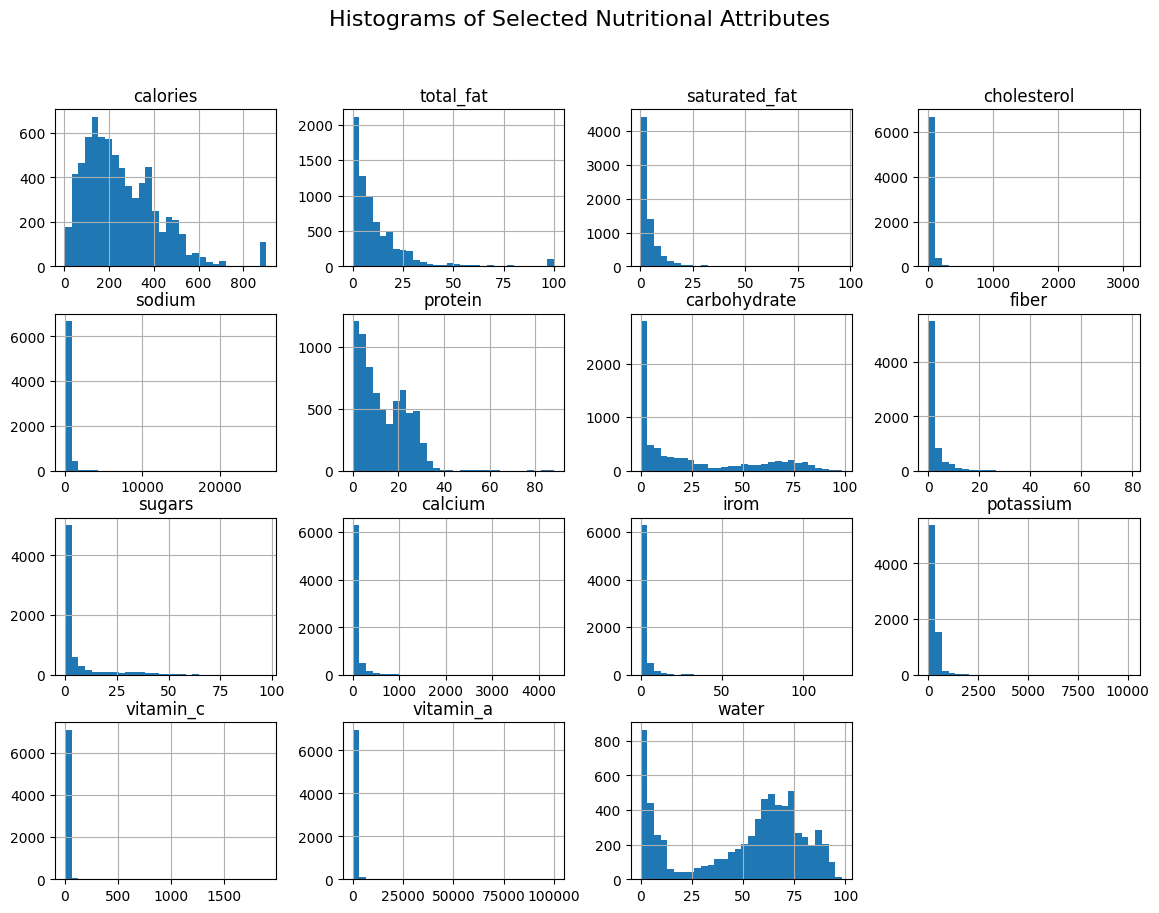

In [22]:
plt.figure(figsize=(14, 8))
data.hist(bins=30, figsize=(14, 10))
plt.suptitle("Histograms of Selected Nutritional Attributes", fontsize=16)
plt.show()

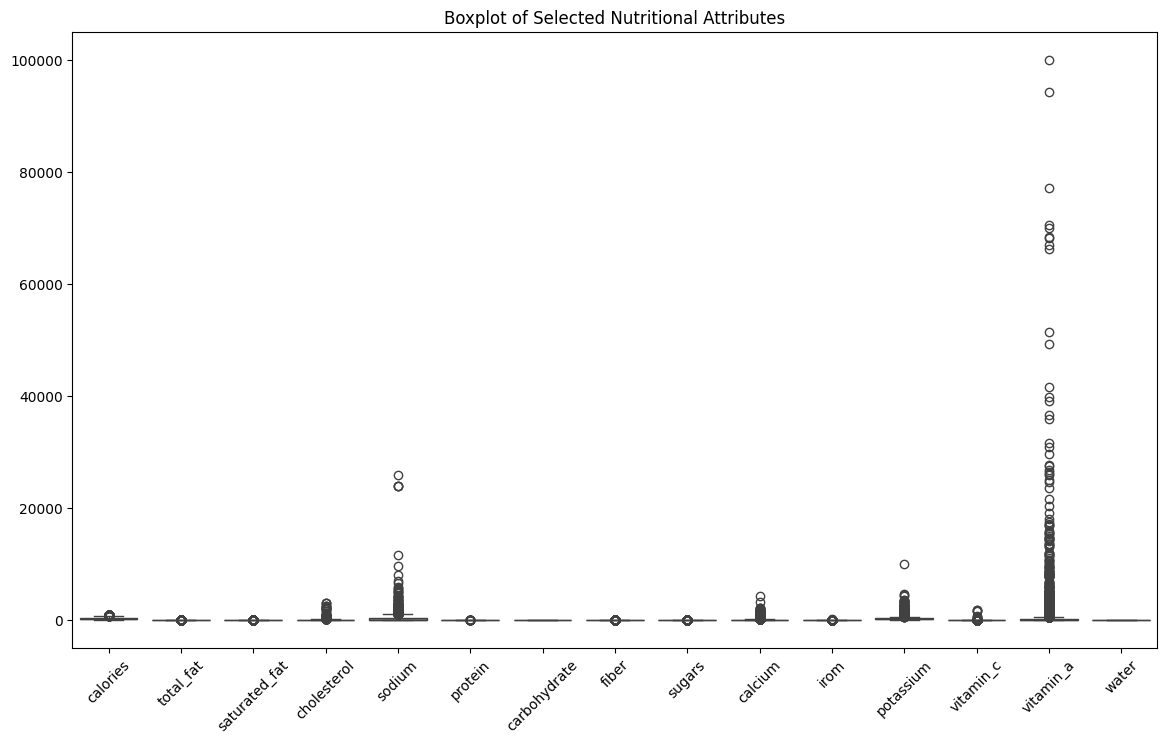

In [23]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data)
plt.title("Boxplot of Selected Nutritional Attributes")
plt.xticks(rotation=45)
plt.show()


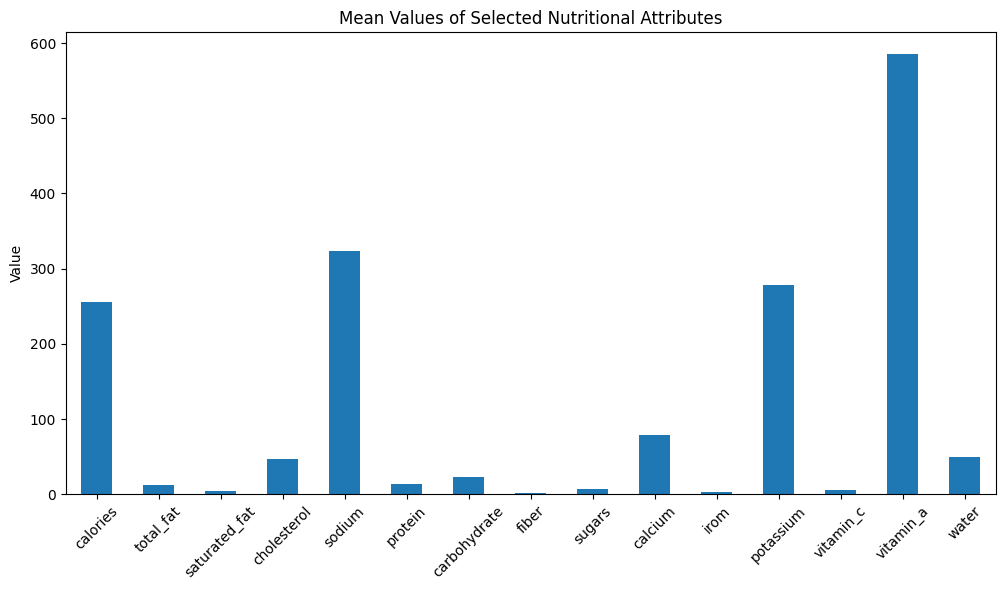

In [24]:
plt.figure(figsize=(12, 6))
data.mean().plot(kind='bar')
plt.title("Mean Values of Selected Nutritional Attributes")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()


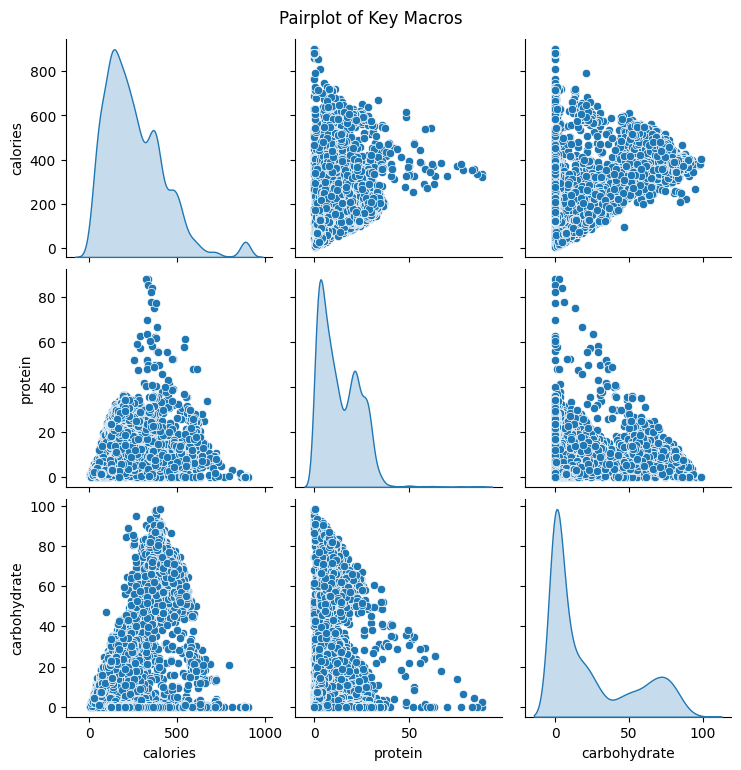

In [50]:


columns = ["calories", "protein", "carbohydrate", "fat"]
existing_cols = [col for col in columns if col in data.columns]


sns.pairplot(data[existing_cols], diag_kind="kde")
plt.suptitle("Pairplot of Key Macros", y=1.02)
plt.show()


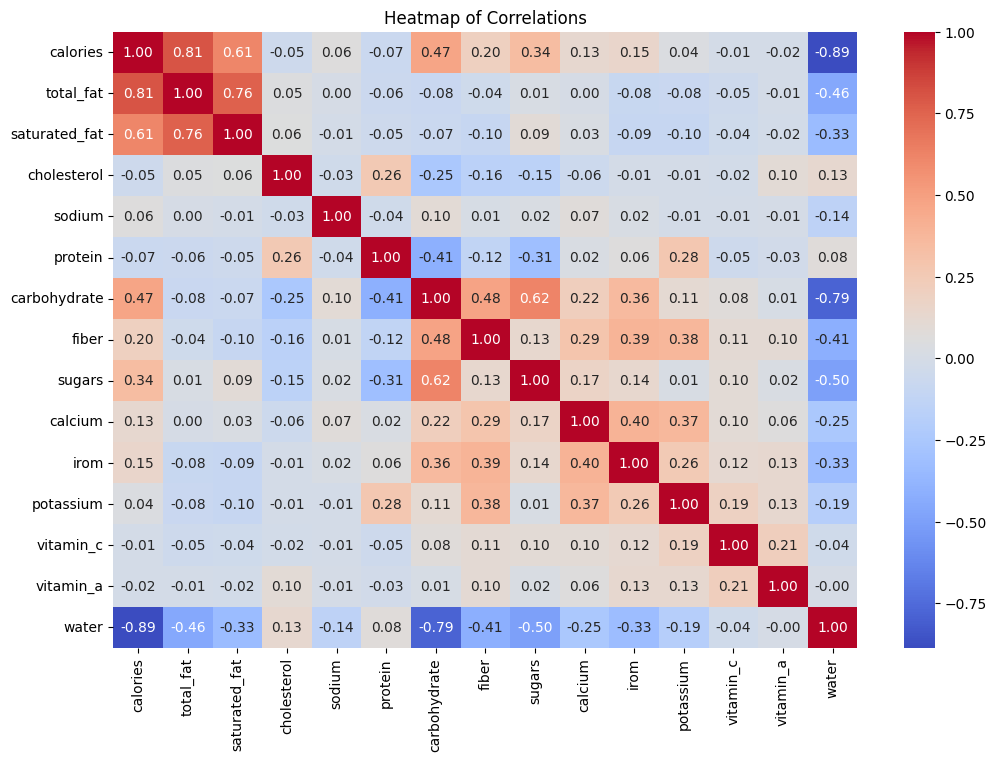

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Correlations")
plt.show()


In [40]:
data["calorie_level"] = pd.cut(data["calories"], bins=3, labels=["Low", "Medium", "High"])
data["protein_level"] = pd.cut(data["protein"], bins=3, labels=["Low", "Medium", "High"])

crosstab = pd.crosstab(data["calorie_level"], data["protein_level"])
print("\n Cross-tabulation (Calories vs Protein) \n", crosstab)


 Cross-tabulation (Calories vs Protein) 
 protein_level   Low  Medium  High
calorie_level                    
Low            4479     284     2
Medium         2130      73    16
High            213       2     0
